# Sequence Alignment via Dynamic Programming & Backtracking

## Dynamic Programming

In [1]:
import numpy as np
import matplotlib.pyplot as plt

Lets write a recursive function that returns the n-th Fibonacci number

In [2]:
#Fib(1) = Fib(2) = 1
#Fib(n) = Fib(n-1) + Fib(n-2)

def rec_fib(n):
    if n <= 2:
        result = 1
    else:
        result = rec_fib(n-1) + rec_fib(n-2)
    return result


Here recursion happens via calling the function in its own body, but providing a "basecase" or exit condition, so that the recursion stops once the problem is solved.

In [3]:
print(rec_fib(8))
%timeit -r 1 -n 1 rec_fib(8)

21
2.42 µs ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)


In [4]:
%%capture
times = []
for i in range(30):
    foo = %timeit -o -r 1 -n 1 rec_fib(i)
    times.append(float(foo.average))

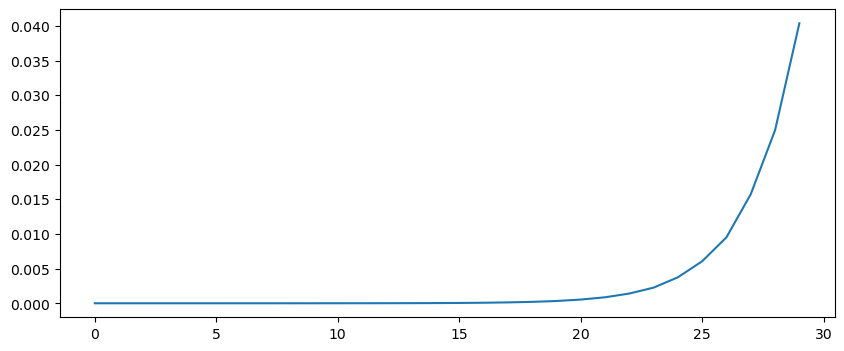

In [5]:
plt.figure(figsize= (10,4))
plt.plot(np.arange(0, len(times),1), times)
plt.show()

Unfortunately the time complexity of our recursive function is really bad. Since the fib(n-1) of this iteration becomes the fib(n-2) of the next iteration we can save alot of time by simply recycling these, instead of tossing them like we do now. This is why we use "memoization". 

### Dynamic Programming - Top-Down

In [6]:
lookup = {}

def fib(n):
    if n in lookup:
        return lookup[n]
    if n <= 2:
        result = 1
    else:
        result = fib(n-1) + fib(n-2)
    
    lookup[n] = result
    return result

In [7]:
%%capture
times = []
for i in range(300):
    foo = %timeit -o -r 1 -n 1 fib(i)
    times.append(float(foo.average))

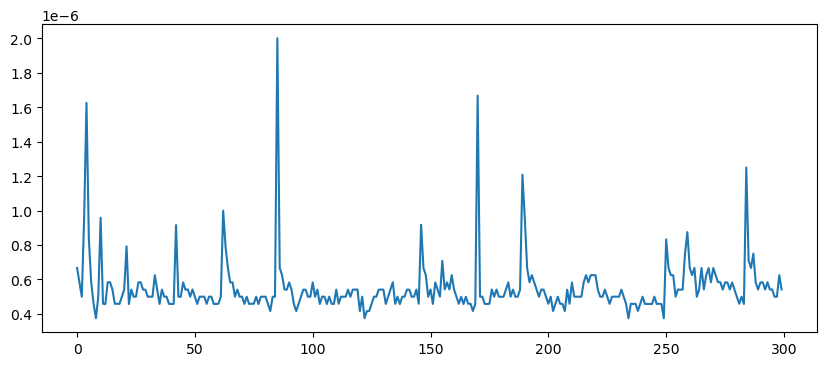

In [8]:
plt.figure(figsize= (10,4))
plt.plot(np.arange(0, len(times),1), times)
plt.show()

Looks way faster.
So this is what the *"top-down"* approach to dynamic programming means at a high level.
Dynamic Programming = Recursion + Memoization

### Dynamic Programming - Bottom-up

In [9]:
def fib(n):
    lookup = {}
    
    for i in range(1, n+1):
        if i <= 2:
            result = 1
        else:
            result = lookup[i-1] + lookup[i-2]
            
        lookup[i] = result
    
    return lookup[n]


Not much has changed. But the dict we use for storing our fib-numbers is now initialized inside the function and therefore reinitialized each time the function is called. Secondly we use a for-loop to calculate all fibonacci-numbers up to n when calling the function.

In [10]:
%%capture
times = []
for i in range(1, 300):
    foo = %timeit -o -r 1 -n 1 fib(i)
    times.append(float(foo.average))

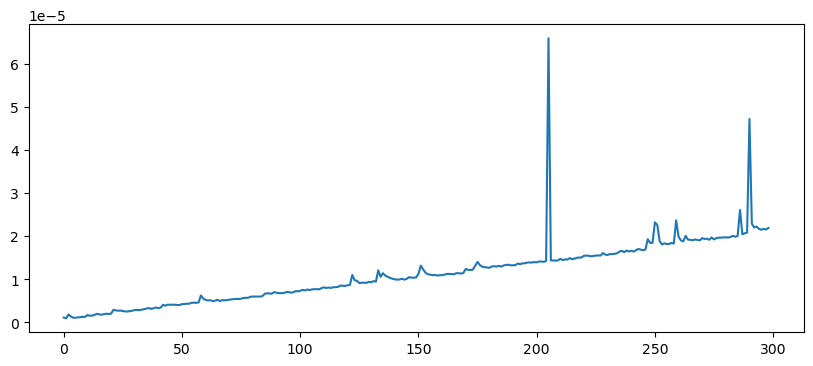

In [11]:
plt.figure(figsize= (10,4))
plt.plot(np.arange(0, len(times),1), times)
plt.show()

This approach gives somewhat similiar results for low fib-numbers although storing the solutions to the subproblems in a local, not a global variable and therefore having shorter memory over the calculation of many different fib-numbers. Over rising fib-numbers the time complexity rises roughly linear, instead of staying at an approximate level like in the top-down-case.

## Backtracking

Another Algorithmic paradigm we will need to cover before looking at sequence alignments is called backtracking. A common example for this paradigm is the *"N-Queens"*-Problem.

### N-Queens-Problem

The *"N-Queens"*-Problem is a problem in which one is asked to placen N Queens on a chessboard made up of N x N rows and columns, so that they cant instantaneously beat each other. The ways a queen can beat any other figure is shown below.

In [92]:
from IPython.display import Image
Image(url= "https://media.geeksforgeeks.org/wp-content/uploads/chessboard-queen.png")

In [75]:
class NQueens:
    def __init__(self, n):
        self.n = n
        self.results = []
        
        
    def offset(self):
        for i in range(0, self.n):
            self.iterator = i
            self.col = set()
            self.posDiag = set()
            self.negDiag = set()
            self.board = np.full((self.n,self.n),".") 
            self.backtrack(r = 0)
            
    def backtrack(self,r):
        if r == self.n:
            self.results.append(self.board)
            return
        else:
            for c in range(0 + self.iterator, self.n):
                if c in self.col or (r+c) in self.posDiag or (r-c) in self.negDiag:
                    continue
                else:
                    self.col.add(c)
                    self.posDiag.add(r+c)
                    self.negDiag.add(r-c)
                    self.board[r][c] = "Q"

                    self.backtrack(r + 1)



The algorithms receives a number n that is the number of queens as well as the n x n dimensions of the board and initializes an empty board and an empty list that the correct boards will be appended to. It also initializes empty sets that will memorize the constraints for us that result from queens already being on the board and their degrees of freedom. Then the backtracking gets started at row zero. It first evaluates if the current row is smaller n (base case) and then iterates over the columns in the current row and checks the sets containing the fields affected by the degrees of freedom of queens already on the board against the "[r][c]" position we are currently iterating over. If we find an available spot a "Q" gets set there and its degrees of freedom are added to the sets, then the backtracking algo calls itself with row = row + 1 to continue in the next row. When the basecase evaluates to True and all rows have been iterated over the board gets appended to results. The outermost loop adds an offset to the next backtracking round so the first field to be evaluated will be [0][1] instead of [0][0].

The name "backtracking" describes the nature of the algorithm to go back one branch and continues from there if the field currently evaluated is constrained.

In [77]:
problemz = NQueens(n = 5)
problemz.offset()
problemz.results

[array([['Q', '.', '.', '.', '.'],
        ['.', '.', 'Q', '.', '.'],
        ['.', '.', '.', '.', 'Q'],
        ['.', 'Q', '.', '.', '.'],
        ['.', '.', '.', 'Q', '.']], dtype='<U1')]

## Needleman-Wunsch

In [89]:
import pandas as pd

def nw(x, y, match = 1, mismatch = 1, gap = 1):
    nx = len(x)
    ny = len(y)
    # Initialization of Distance Matrix
    F = np.zeros((nx + 1, ny + 1)) #initialize len(x) x len(y) matrix filled with zeros 
    F[:,0] = np.linspace(0, -nx * gap, nx + 1) #fill with the numbers 0:-len(x) along x direction
    F[0,:] = np.linspace(0, -ny * gap, ny + 1) #fill with the numbers 0:-len(y) along y direction
    P = np.zeros((nx + 1, ny + 1)) #initialize
    P[:,0] = 3      
    P[0,:] = 4      
    x = str("."+str(x))
    y = str("."+str(y))
    F = pd.DataFrame(F, columns=list(y), index=list(x))
    P = pd.DataFrame(P, columns=list(y), index=list(x))
    print("F","\n",F,"\n","P","\n",P)

x = "GATTACA"
y = "GCATGCU"  
nw(x,y)

F 
      .    G    C    A    T    G    C    U
.  0.0 -1.0 -2.0 -3.0 -4.0 -5.0 -6.0 -7.0
G -1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
A -2.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
T -3.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
T -4.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
A -5.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
C -6.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
A -7.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0 
 P 
      .    G    C    A    T    G    C    U
.  4.0  4.0  4.0  4.0  4.0  4.0  4.0  4.0
G  3.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
A  3.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
T  3.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
T  3.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
A  3.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
C  3.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
A  3.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0


In the next step, for every [i][j] substring (remember? dynamic programming?), we do the following.

In [96]:
Image(url= "https://miro.medium.com/v2/resize:fit:1366/format:webp/1*x9FhuHbopwjkwbT11RJo6g.png")

We create a vector t with three entries. The first contains the match (post)/substitution (neg) value, the second the gap penalty for a gap in string x, the third a penalty for a gap in y. Now *F* gets filled at [i][j] with the highest value from t at that position. P at [i][j] gets filled with the pointer encoding the direction the path has taken before.

In [99]:
def nw(x, y, match = 1, mismatch = 1, gap = 1):
    nx = len(x)
    ny = len(y)
    # Initialization of Distance Matrix
    F = np.zeros((nx + 1, ny + 1)) #initialize len(x) x len(y) matrix filled with zeros 
    F[:,0] = np.linspace(0, -nx * gap, nx + 1) #fill with the numbers 0:-len(x) along x direction
    F[0,:] = np.linspace(0, -ny * gap, ny + 1) #fill with the numbers 0:-len(y) along y direction
    # Initialization of Pointers
    P = np.zeros((nx + 1, ny + 1)) #initialize
    P[:,0] = 3
    P[0,:] = 4

    t = np.zeros(3)
    for i in range(nx):
        for j in range(ny):
            # consider three cases
            if x[i] == y[j]:
                t[0] = F[i,j] + match
            else:
                t[0] = F[i,j] - mismatch
            t[1] = F[i,j+1] - gap
            t[2] = F[i+1,j] - gap
            # evaluate and enter the maximum score
            tmax = np.max(t)
            F[i+1,j+1] = tmax

            if t[0] == tmax:
                P[i+1,j+1] += 2
            if t[1] == tmax:
                P[i+1,j+1] += 3
            if t[2] == tmax:
                P[i+1,j+1] += 4

    x = str("."+str(x))
    y = str("."+str(y))
    F = pd.DataFrame(F, columns=list(y), index=list(x))
    P = pd.DataFrame(P, columns=list(y), index=list(x))
    print("F","\n",F,"\n","P","\n",P)

x = "GATTACA"
y = "GCATGCU"
nw(x,y)

F 
      .    G    C    A    T    G    C    U
.  0.0 -1.0 -2.0 -3.0 -4.0 -5.0 -6.0 -7.0
G -1.0  1.0  0.0 -1.0 -2.0 -3.0 -4.0 -5.0
A -2.0  0.0  0.0  1.0  0.0 -1.0 -2.0 -3.0
T -3.0 -1.0 -1.0  0.0  2.0  1.0  0.0 -1.0
T -4.0 -2.0 -2.0 -1.0  1.0  1.0  0.0 -1.0
A -5.0 -3.0 -3.0 -1.0  0.0  0.0  0.0 -1.0
C -6.0 -4.0 -2.0 -2.0 -1.0 -1.0  1.0  0.0
A -7.0 -5.0 -3.0 -1.0 -2.0 -2.0  0.0  0.0 
 P 
      .    G    C    A    T    G    C    U
.  4.0  4.0  4.0  4.0  4.0  4.0  4.0  4.0
G  3.0  2.0  4.0  4.0  4.0  6.0  4.0  4.0
A  3.0  3.0  2.0  2.0  4.0  4.0  4.0  4.0
T  3.0  3.0  5.0  3.0  2.0  4.0  4.0  4.0
T  3.0  3.0  5.0  3.0  5.0  2.0  6.0  6.0
A  3.0  3.0  5.0  2.0  3.0  5.0  2.0  6.0
C  3.0  3.0  2.0  3.0  3.0  5.0  2.0  4.0
A  3.0  3.0  3.0  2.0  7.0  5.0  3.0  2.0


Now the backtracking comes in. We start at the most bottom right cell. From there we backtrace using the pointer matrix P, going back either diagonally indicating match or substitution or going back upwards, indicating a gap in x or going back leftward, indicating a gap in y.
Since we´re reversing starting point and base case, we have to reverse the string in the end.

In [100]:
def nw(x, y, match = 1, mismatch = 1, gap = 1):
    nx = len(x)
    ny = len(y)
    # Initialization of Distance Matrix
    F = np.zeros((nx + 1, ny + 1)) #initialize len(x) x len(y) matrix filled with zeros 
    F[:,0] = np.linspace(0, -nx * gap, nx + 1) #fill with the numbers 0:-len(x) along x direction
    F[0,:] = np.linspace(0, -ny * gap, ny + 1) #fill with the numbers 0:-len(y) along y direction
    # Initialization of Pointers
    P = np.zeros((nx + 1, ny + 1)) #initialize
    P[:,0] = 3      
    P[0,:] = 4      

    # Distance Matrix and ?
    t = np.zeros(3)
    for i in range(nx):
        for j in range(ny):
            # consider three cases
            if x[i] == y[j]:
                t[0] = F[i,j] + match
            else:
                t[0] = F[i,j] - mismatch
            t[1] = F[i,j+1] - gap
            t[2] = F[i+1,j] - gap
            # evaluate and enter the maximum score
            tmax = np.max(t)
            F[i+1,j+1] = tmax

            if t[0] == tmax:
                P[i+1,j+1] += 2
            if t[1] == tmax:
                P[i+1,j+1] += 3
            if t[2] == tmax:
                P[i+1,j+1] += 4

    # Backtrace for an optimal alignment.
    i = nx
    j = ny
    rx = []
    ry = []
    while i > 0 or j > 0:
        if P[i,j] in [2, 5, 6, 9]:
            rx.append(x[i-1])
            ry.append(y[j-1])
            i -= 1
            j -= 1
        elif P[i,j] in [3, 5, 7, 9]:
            rx.append(x[i-1])
            ry.append('-')
            i -= 1
        elif P[i,j] in [4, 6, 7, 9]:
            rx.append('-')
            ry.append(y[j-1])
            j -= 1


    # Reverse the strings.
    rx = ''.join(rx)[::-1]
    ry = ''.join(ry)[::-1]
    return '\n'.join([rx, ry])
   

In [103]:
x = "GATTACA"
y = "GCATGCU"
print(nw(x,y))

G-ATTACA
GCA-TGCU


In [104]:
np.random.seed(42)
x = np.random.choice(['A', 'T', 'G', 'C'], 50)
y = np.random.choice(['A', 'T', 'G', 'C'], 50)

print(nw(x, y, gap = 0))
# ----G-C--AGGCAAGTGGGGCACCCGTATCCT-T-T-C-C-AACTTACAAGGGT-C-CC-----CGT-T
# GTGCGCCAGAGG-AAGT----CA--C-T-T--TATATCCGCG--C--AC---GGTACTCCTTTTTC-TA-

print(nw(x, y, gap = 1))
# GCAG-GCAAGTGG--GGCAC-CCGTATCCTTTC-CAAC-TTACAAGGGTCC-CCGT-T-
# G-TGCGCCAGAGGAAGTCACTTTATATCC--GCGC-ACGGTAC-----TCCTTTTTCTA

print(nw(x, y, gap = 2))
# GCAGGCAAGTGG--GGCAC-CCGTATCCTTTCCAACTTACAAGGGTCCCCGTT
# GTGCGCCAGAGGAAGTCACTTTATATCC-GCGCACGGTAC-TCCTTTTTC-TA

----G-C--AGGCAAGTGGGGCACCCGTATCCT-T-T-C-C-AACTTACAAGGGT-C-CC-----CGT-T
GTGCGCCAGAGG-AAGT----CA--C-T-T--TATATCCGCG--C--AC---GGTACTCCTTTTTC-TA-
GCAG-GCAAGTGG--GGCAC-CCGTATCCTTTC-CAAC-TTACAAGGGTCC-CCGT-T-
G-TGCGCCAGAGGAAGTCACTTTATATCC--GCGC-ACGGTAC-----TCCTTTTTCTA
GCAGGCAAGTGG--GGCAC-CCGTATCCTTTCCAACTTACAAGGGTCCCCGTT
GTGCGCCAGAGGAAGTCACTTTATATCC-GCGCACGGTAC-TCCTTTTTC-TA
